In [29]:
import pandas as pd
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from warnings import filterwarnings
filterwarnings('ignore')



In [10]:
mnist = datasets.load_digits()
features, labels = mnist.data, mnist.target
X_train,X_test,y_train,y_test=train_test_split(features,labels,test_size=0.2)

In [22]:
dtree = DecisionTreeClassifier(
    criterion="gini", 
    max_depth=8, 
    max_features=32,
    random_state=35)

dtree = dtree.fit(X_train, y_train)
dtree_predicted = dtree.predict(X_test)

knn = KNeighborsClassifier(n_neighbors=299).fit(X_train, y_train)
knn_predicted = knn.predict(X_test)

svm = SVC(
    C=0.1, 
    gamma=0.003,
          
    probability=True,
    random_state=35
).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)

In [23]:
print("[accuarcy]")
print("d-tree: ",accuracy_score(y_test, dtree_predicted))
print("knn   : ",accuracy_score(y_test, knn_predicted))
print("svm   : ",accuracy_score(y_test, svm_predicted))

[accuarcy]
d-tree:  0.8055555555555556
knn   :  0.8166666666666667
svm   :  0.8861111111111111


In [16]:
svm_proba = svm.predict_proba(X_test)
print(svm_proba[0:2])

[[5.21455752e-03 6.16351636e-01 2.68308894e-02 1.55578845e-02
  1.10980715e-02 3.39059856e-02 5.80379715e-03 1.64672008e-02
  2.42391320e-01 2.63786576e-02]
 [3.91801983e-04 4.49144903e-04 2.91271388e-04 2.50072757e-04
  3.07378099e-04 2.98902703e-04 9.96777870e-01 3.50465180e-04
  4.96488466e-04 3.86604311e-04]]


In [25]:
dtree_proba = dtree.predict_proba(X_test)
print(dtree_proba[0:2])

[[0.         0.84337349 0.03614458 0.01204819 0.03614458 0.
  0.         0.         0.07228916 0.        ]
 [0.         0.         0.         0.         0.         0.
  1.         0.         0.         0.        ]]


In [27]:
knn_proba = knn.predict_proba(X_test)
print(knn_proba[0:2])

##np.argmax

[[0.00334448 0.27090301 0.20735786 0.04013378 0.00334448 0.11036789
  0.03010033 0.08695652 0.23745819 0.01003344]
 [0.08361204 0.13377926 0.02675585 0.00668896 0.13712375 0.00334448
  0.5083612  0.         0.10033445 0.        ]]


In [30]:
np.argmax(knn_proba[:1]), np.argmin(knn_proba[:1])

(1, 0)

In [17]:
#### 앙상블 모델 #####

In [51]:
voting_clf = VotingClassifier(
    estimators=[
        ('decision_tree', dtree), 
        ('knn', knn), 
        ('svm', svm)], 
    weights=[1,1,1], 
    voting='hard').fit(X_train, y_train)

hard_voting_predicted = voting_clf.predict(X_test)
hard_vote = accuracy_score(y_test, hard_voting_predicted)

In [52]:
hard_vote

0.8944444444444445

In [31]:
hard_voting_predicted[[1,50]]

array([6, 4])

In [ ]:
## dtree: 2, knn:2, svm:1==> 2(2):1(1) -==> 다수결의 워칙에 따라 2로 판단!


In [50]:
voting_clf2 = VotingClassifier(
    estimators=[
        ('decision_tree', dtree), 
        ('knn', knn), 
        ('svm', svm)], 
    weights=[1,1,1], 
    voting='soft').fit(X_train, y_train)

soft_voting_predicted = voting_clf2.predict(X_test)
soft_vote = accuracy_score(y_test, soft_voting_predicted)

In [33]:
## 그래프로 그려보세요. accuracy(dtree, knn, svm, hard voting, soft voting)

In [34]:
import matplotlib.pyplot as plt

In [54]:
xlist = ['knn', 'svm', 'dtree', 'hard', 'soft']
ylist = [accuracy_score(y_test, knn_predicted), accuracy_score(y_test, svm_predicted), accuracy_score(y_test, dtree_predicted), hard_vote, soft_vote]

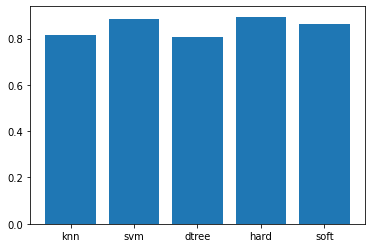

In [59]:
plt.bar(xlist,ylist)
plt.show()

In [ ]:
f

In [4]:
i, hap = 0, 0
for i in range(3333,10000):
    if (i%1234==0) :
        hap = hap+i
    if(hap>100000):
        print("%d" %hap-i)
    
print(hap)

40722


In [32]:
hap = 0
for i in range(3333,10000,1):
    if i%1234==0:
        continue
    print(i)
    hap+=i
    if hap>100000:
        hap-=i
        break
print(hap)

3333
3334
3335
3336
3337
3338
3339
3340
3341
3342
3343
3344
3345
3346
3347
3348
3349
3350
3351
3352
3353
3354
3355
3356
3357
3358
3359
3360
3361
3362
97063


In [42]:
hap = 0
for i in range(3333,10000):
    if (i%1234!=0) :
        hap = hap+i
    if(hap>100000):
        print("%d" %(hap-i))
        break

97063


In [39]:
i, hap = 0, 0
print(type(hap))

<class 'int'>


In [49]:
hap = 0 #합 초기값
for i in range(3333,10000): #i를 3333부터 10000까지 증가
    if (i%1234!=0) :#i가 1234의 배수가 아닐때
        continue #skip하고 다음 i로 넘어감
    hap = hap+i #1234의 배구라면 합에 i더함
    if(hap>100000): #합이 100000가 넘으면 
        break #for문 escape!!!돔향챠!!
print("%d" %(hap))# 1.숫자인 합 프린트, 숫자아니면 에러남
print(hap)# 2.고냥 합 프린트
print("합:%d" %(hap))# 3."합:"프린트하고 숫자 합 프린트
print("합:",hap)# 4."합:"쓰고 2번처럼 합 프린트 (띄어쓰기 들어감)
print("합:"+str(hap)) # 5. 합(숫자)를 string으로 바꾼뒤 "합:"뒤에 더한 뒤에 프린트

40722
40722
합:40722
합: 40722
합:40722
